In [1]:
using DelimitedFiles, Plots

In [15]:
fam = "PF00397"
method = "sce"
nsamples = "50"
#namefile = "run_epsilon_"*fam*"_"*method*"_"*nsamples*".txt"
namefile = "run_epsilon_"*fam*"_"*method*"_"*nsamples*"_betafixed.txt"

data_epsilon = readdlm(namefile);

In [28]:
namefile

"run_epsilon_PF00397_sce_50_betafixed.txt"

In [16]:
param_epsilon = data_epsilon[1,:]

12-element Vector{Any}:
    50
      "PF00397"
    31
 59696
     5
     0.9
     0.001
     1.0e-10
      "random"
      "sce"
  2000
     0.5

In [17]:
neps = sum(typeof.(data_epsilon[2,:]) .== Float64)
res_epsilon = data_epsilon[2:end,1:neps];

In [18]:
neps

11

In [19]:
#data_epsilon[2:end,neps+1]

In [20]:
epsilons = res_epsilon[1,:]

11-element Vector{Any}:
 -0.0
 -0.1
 -0.2
 -0.3
 -0.4
 -0.5
 -0.6
 -0.7
 -0.8
 -0.9
 -1.2

In [21]:
μΔEs = res_epsilon[2,:]
σΔEs = res_epsilon[3,:]
μΔUs = res_epsilon[4,:]
σΔUs = res_epsilon[5,:]
μdist = res_epsilon[6,:]
σdist = res_epsilon[7,:];

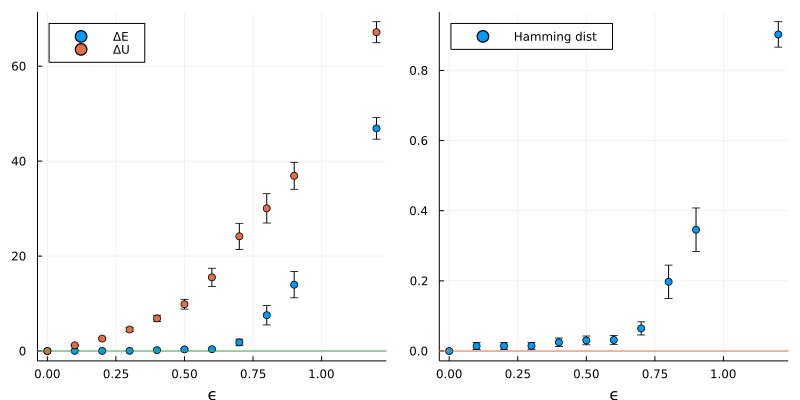

In [22]:
tiny = 0
pΔ = scatter(-epsilons.+tiny, μΔEs.+tiny, yerr=σΔEs, label="ΔE", legend=:topleft)
xlabel!("ϵ")
scatter!(-epsilons, μΔUs, yerr=σΔUs, label="ΔU")
hline!([0.0], label="")

pdist = scatter(-epsilons.+tiny, μdist.+tiny, yerr=σdist, label="Hamming dist", legend=:topleft)
hline!([0.0], label="")
xlabel!("ϵ")
plot(pΔ, pdist, size=(800,400))


In [23]:
μE = res_epsilon[8,:]
σE = res_epsilon[9,:]
μU = res_epsilon[10,:]
σU = res_epsilon[11,:]
μS = res_epsilon[12,:]
σS = res_epsilon[13,:];


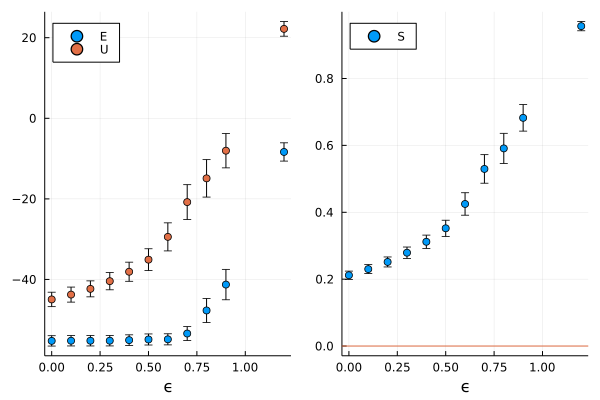

In [24]:
pu = scatter(-epsilons, μE, yerr=σE, label="E", legend=:topleft)
scatter!(-epsilons, μU, yerr=σU, label="U")
xlabel!("ϵ")
ps = scatter(-epsilons, μS, yerr=σS, label="S", legend=:topleft)
xlabel!("ϵ")
hline!([0.0], label="")
plot(pu, ps)

In [29]:
μpolars = res_epsilon[14,:]
σpolars = res_epsilon[15,:]
μbetas = res_epsilon[16,:]
σbetas = res_epsilon[17,:]
μerrs = res_epsilon[18,:]
σerrs = res_epsilon[19,:]
nbsol_mean = res_epsilon[20,:]
nbsol_std = res_epsilon[21,:];

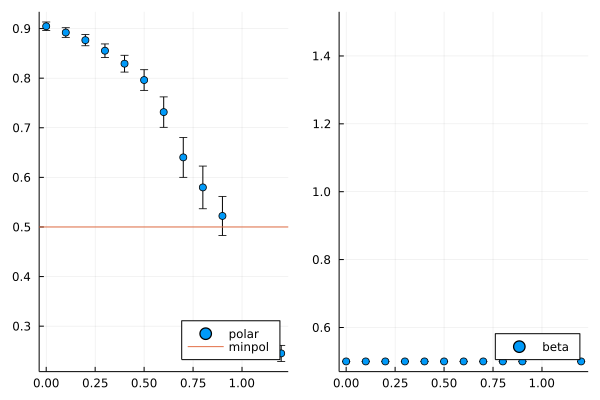

In [30]:
minpol = param_epsilon[12]
pp = scatter(-epsilons, μpolars, yerr=σpolars, label="polar", legend=:bottomright)
hline!([minpol], label="minpol")
pb = scatter(-epsilons, μbetas, yerr=σbetas, label="beta", legend=:bottomright)
plot(pp, pb)

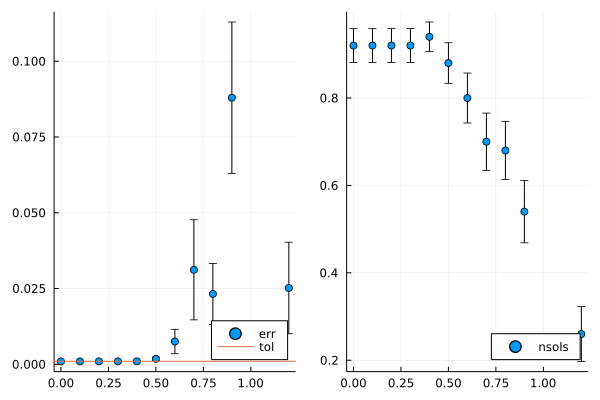

In [31]:
tol = param_epsilon[7]
pe = scatter(-epsilons, μerrs, yerr=σerrs, label="err", legend=:bottomright)
hline!([tol], label="tol")
pnunsat = scatter(-epsilons, nbsol_mean, yerr=nbsol_std, label="nsols", legend=:bottomright)
plot(pe, pnunsat)